In [1]:
# Description: Plotting the results of the simulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [2]:
languages = ['de', 'en', 'fr', 'es', 'hi', 'th']

In [11]:
seq_num = 1

In [12]:
chkpt_subdirs = os.listdir(f'/Users/karanpraharaj/fairseq/checkpoints/seq_{seq_num}')

In [13]:
chkpt_subdirs = [x for x in chkpt_subdirs if 'hop' in x]

In [6]:
# Collect all subdirectories in test results directory.
# chkpt_subdirs = os.listdir('test')
# chkpt_subdirs = [x for x in chkpt_subdirs if 'hop' in x]

if seq_num == 0:
    chkpt_subdirectories = ['hop_IPT_de_0', 'hop_IPT_fr_0','hop_IPT_hi_0', 'hop_IPT_es_0', 'hop_IPT_en_0',
                            'hop_IPT_th_0', 'hop_2_fr_1', 'hop_3_hi_1', 'hop_4_es_1', 'hop_5_th_1', 
                            'hop_6_es_2', 'hop_7_en_1', 'hop_8_de_1', 'hop_9_en_2',  'hop_10_de_2',
                            'hop_11_fr_2', 'hop_12_hi_2', 'hop_13_es_3', 'hop_14_hi_3', 'hop_15_en_3', 
                            'hop_16_th_2', 'hop_17_fr_3', 'hop_18_hi_4', 'hop_19_de_3', 'hop_20_es_4', 
                            'hop_21_th_3', 'hop_22_fr_4', 'hop_23_de_4', 'hop_24_th_4', 'hop_25_en_4',  
                            ]
elif seq_num == 1:
    # [SEQ 1]
    chkpt_subdirectories = [
        'hop_IPT_th_0', 'hop_IPT_en_0', 'hop_IPT_es_0', 'hop_IPT_hi_0', 'hop_IPT_de_0',
        'hop_IPT_fr_0', 'hop_2_th_1',   'hop_3_hi_1',   'hop_4_fr_1',   'hop_5_de_1',   
        'hop_6_es_1',   'hop_7_en_1',   'hop_8_es_2',   'hop_9_hi_2',   'hop_10_th_2',
        'hop_11_de_2',  'hop_12_fr_2',  'hop_13_es_3',  'hop_14_en_2',  'hop_15_de_3',
        'hop_16_th_3',  'hop_17_en_3',  'hop_18_fr_3',  'hop_19_hi_3',  'hop_20_hi_4',
        'hop_21_es_4',  'hop_22_fr_4',  'hop_23_th_4',  'hop_24_de_4',  'hop_25_en_4',
        ]
# elif seq_num == 2:

In [9]:
results_by_lang = {lang: [] for lang in languages}

for chkpt_subdir in chkpt_subdirectories:
    # Check if results.log exists.
    if os.path.exists('results/test/' + chkpt_subdir + '/results.log'):
        print('Path exists: ' + chkpt_subdir)
        # Read csv and set index to test_lang
        chkpt_results_df = pd.read_csv('test/' + chkpt_subdir + '/results.log', sep='\t', index_col='test_lang')
        for lang in languages:
            accuracy_score = chkpt_results_df['accuracy'][lang].item()
            results_by_lang[lang].append(accuracy_score)
    else:
        for lang in languages:
            results_by_lang[lang].append(0)

/var/folders/st/x_vhp24d0s3f39fbdlpvxhqm0000gn/T/ipykernel_45984/1744637007.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xtick_labels, rotation=90, fontsize=7)


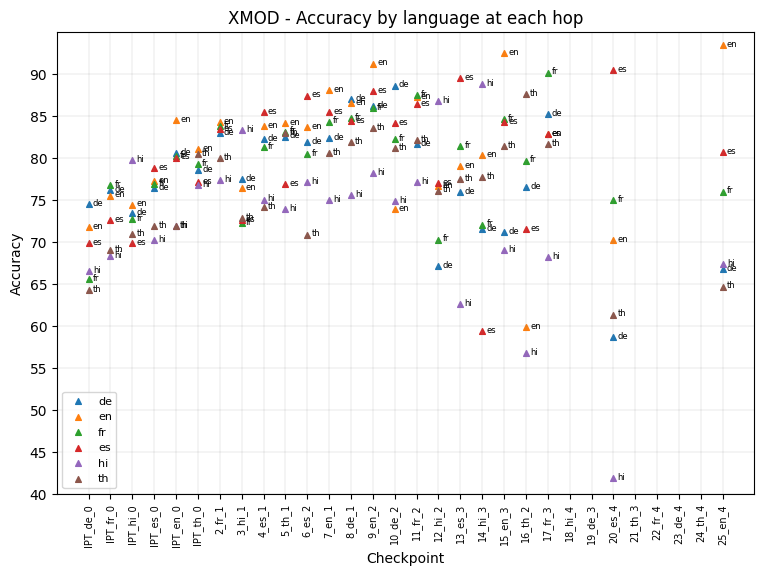

In [6]:
# Plot the accuracy scores for each language as a scatter plot. 
fig, ax = plt.subplots(figsize=(9, 6))
xtick_labels = ['_'.join(x_label.split('_')[1:]) for x_label in chkpt_subdirectories]
for lang in languages:
    # The marker is a triangle if the test language is the same as the training language. Else, it is a circle.
    ax.scatter(chkpt_subdirectories, results_by_lang[lang], label=lang, marker='^', s=17)
    # Annotate the marker with the name of the test language.
    for i, txt in enumerate(chkpt_subdirectories):
        if results_by_lang[lang][i] > 0:
           ax.annotate(lang, (chkpt_subdirectories[i], results_by_lang[lang][i]), xytext=(3, -1), size=6, textcoords='offset points')
ax.set_xticklabels(xtick_labels, rotation=90, fontsize=7)
ax.set_ylim(40, 95)
# Set y-axis to 0-100 with 5 increments.
ax.set_yticks(np.arange(40, 95, 5))
# Show grid lines.
ax.grid(True)
# Lighten the grid lines.
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_xlabel('Checkpoint')
ax.set_ylabel('Accuracy')
ax.set_title('XMOD - Accuracy by language at each hop')
ax.legend(scatterpoints=1, loc='lower left', fontsize=8)
plt.savefig('test/accuracy_by_lang.png', dpi=800)
plt.show()
